The code from these labs can be reused for your coursework apparently.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.mosaicplot import mosaic


In [38]:
df = pd.read_csv('../labData/iris.data',
                        names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [5]:
df[df.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


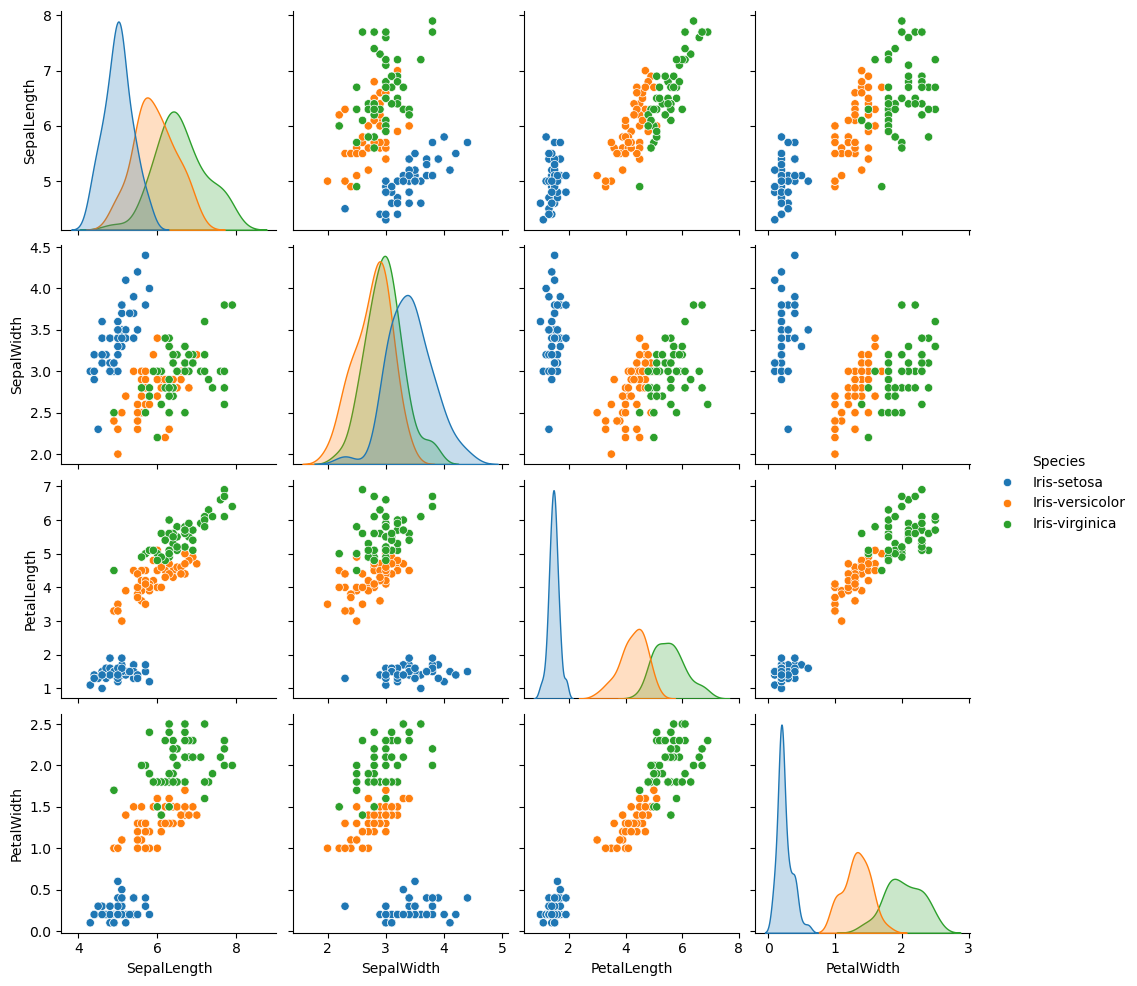

In [8]:
sns.pairplot(df, hue = "Species")

<Axes: xlabel='PetalWidth'>

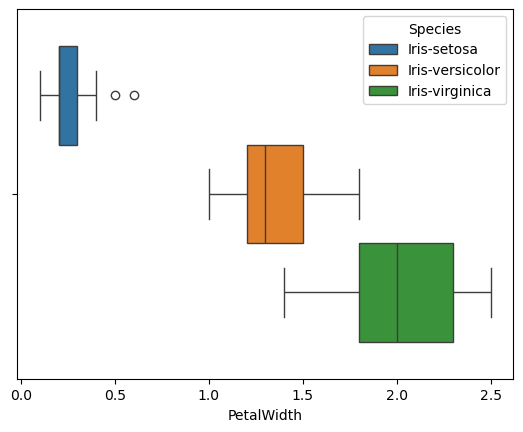

In [12]:
sns.boxplot(df, x = "PetalWidth", hue = "Species") #, y = "SepalLength" )

In [37]:
# You can't get the correlations of strings, so remove the species for this line only.
dfNoSpecies = df.drop(columns = "Species", axis = 1)
dfNoSpecies.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<Axes: xlabel='PetalWidth', ylabel='PetalLength'>

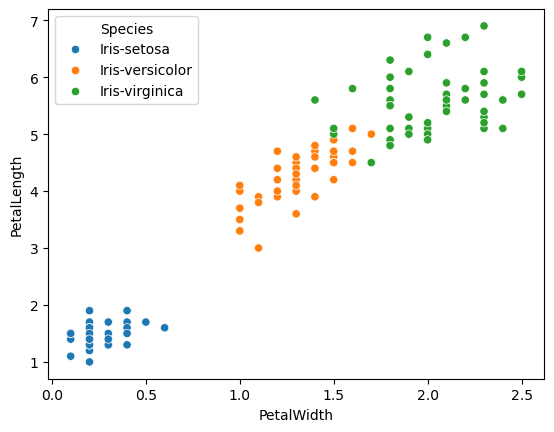

In [39]:
sns.scatterplot(data = df, x = "PetalWidth", y = "PetalLength", hue = "Species")

In [41]:
dfCorr = dfNoSpecies.corr()

<Axes: >

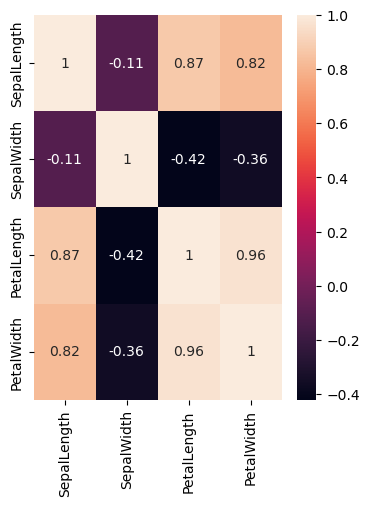

In [48]:
plt.figure(figsize = (4, 5))
sns.heatmap(dfCorr, annot = True)

<Axes: >

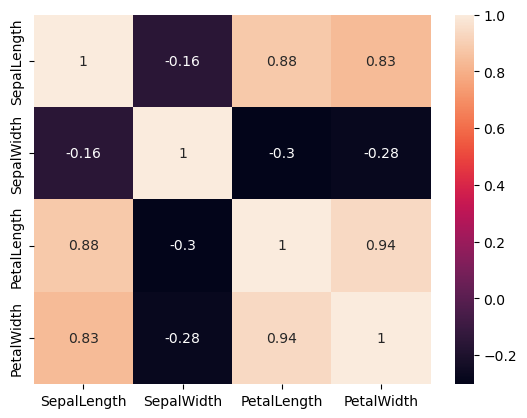

In [52]:
dfCorr = dfNoSpecies.corr(method = "spearman")
sns.heatmap(dfCorr, annot = True)
# Minor differences. In your coursework, "reflect on your understanding" (?)
# Presumably means talk about the three.

# Linear Regression

In [58]:
df = pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: xlabel='TV', ylabel='Sales'>

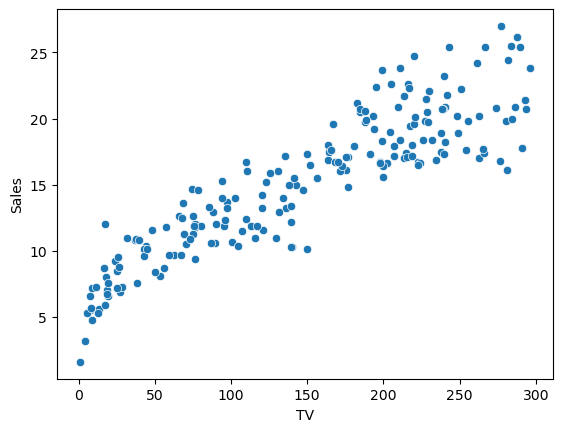

In [61]:
# Significant positive correlation
sns.scatterplot(df, x = "TV", y = "Sales")

<Axes: >

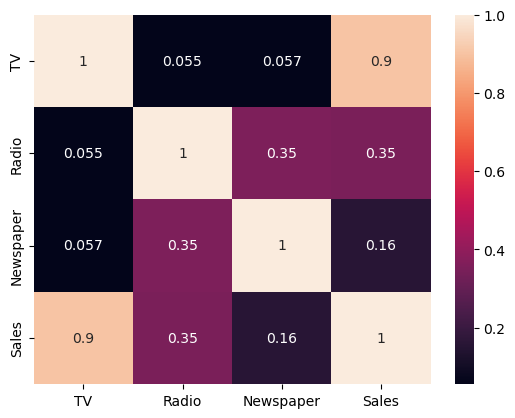

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [77]:
x = df[["TV"]] # I'm not sure why this is needed, but it doesn't work without it.
# Seems that with one bracket it's a Series, with 2 its a one-column Dataframe.
# You can't use the LinearRegression function below with a Series.
y = df["Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.20)

In [80]:
x.shape # 200
x_train.shape # 160
x_test.shape # 40

(40, 1)

In [74]:
clf = LinearRegression() 

In [78]:
clf.fit(x_train, y_train)

LinearRegression()

In [81]:
y_pred = clf.predict(x_test)

In [87]:
r2_score(y_pred, y_test)

0.7572726110604379

Text(0, 0.5, 'Resulting sales ($)')

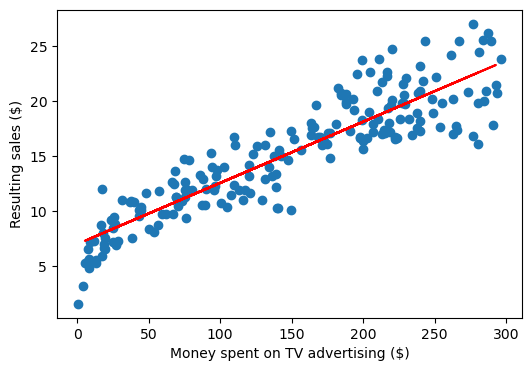

In [91]:
plt.figure(figsize = (6,4))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = "red")
plt.xlabel("Money spent on TV advertising ($)")
plt.ylabel("Resulting sales ($)")